In [1]:
!pip install pmdarima

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
for dirname, _, filenames in os.walk('C:/Users/Apurva/Downloads/archive/Walmart Data Analysis and Forcasting.csv"'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/fd/10/236fcc0306f85a2db1b8bc147aea714b66a2f27bac4d9e09e5b2c5d5dcca/Cython-3.0.11-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 930.9 kB/s eta 0:00:01
   ---------------- ----------------------- 256.0/614.7 kB 1.6 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/614.7 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 2.8 MB/s eta 0:00:01
   -----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [2]:
#Loading the data
data = pd.read_csv('C:/Users/Apurva/Downloads/archive/Walmart Data Analysis and Forcasting.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.shape

(6435, 8)

In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
missing_values = data.isnull().sum()

In [7]:
print(missing_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [10]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

Feature Engineering

In [13]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [14]:
# Extract relevant date-time features
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [15]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


In [16]:
data['Temp_Category'] = pd.cut(data['Temperature'], bins=[-10, 40, 70, 100], labels=['Cold', 'Moderate', 'Hot'])

In [17]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,DayOfWeek,Month,Year,Temp_Category
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010,Moderate
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010,Cold
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010,Cold
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010,Moderate
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010,Moderate


Exploratory Data Analysis (EDA) 

In [18]:
#Ranking stores in descending order of weekly sales totals
data[['Store','Weekly_Sales']].groupby(['Store'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)#.plot.bar()


,Weekly_Sales
Store,
20,2.107677e+06
4,2.094713e+06
14,2.020978e+06
13,2.003620e+06
2,1.925751e+06
10,1.899425e+06
27,1.775216e+06
6,1.564728e+06
1,1.555264e+06


Stores 20,4, 14 and 13 are the top 4 performing stores on total sales

Stores 36,5,44 and 33 are the bottom 4 perfomers on tatal sales

<Axes: >

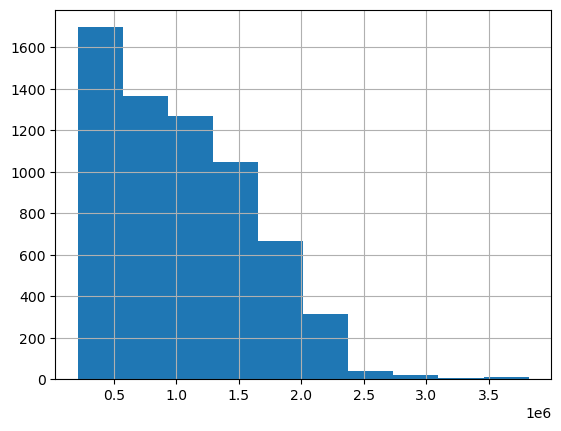

In [20]:
data['Weekly_Sales'].dropna().hist()

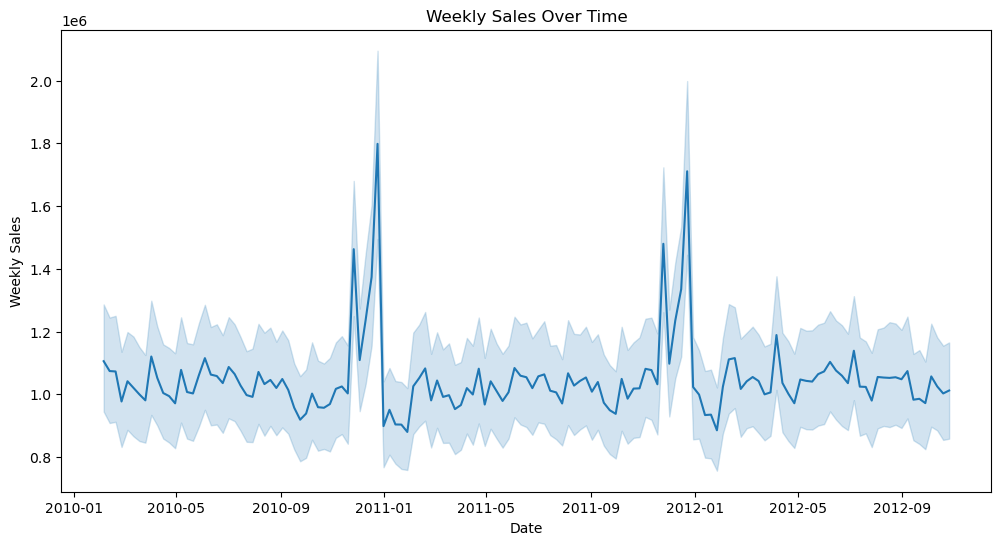

In [21]:
# Visualize the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weekly_Sales', data=data)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

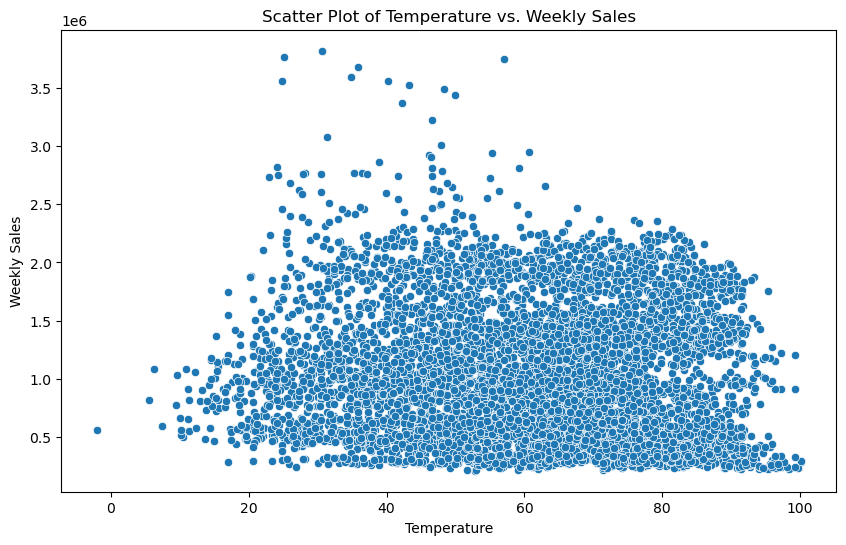

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=data)
plt.title('Scatter Plot of Temperature vs. Weekly Sales')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

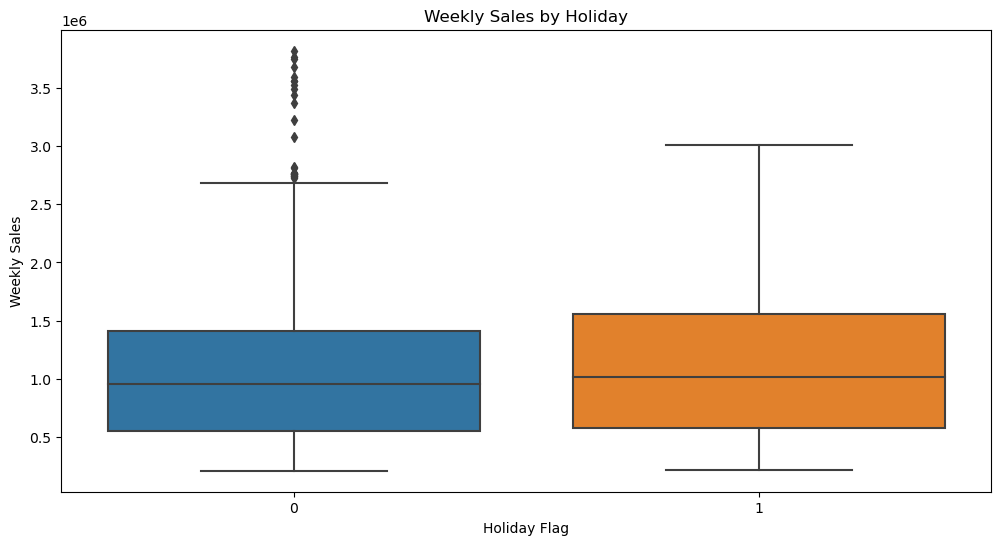

In [23]:
#Visualizing sales statistics on normal days and holidays 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales by Holiday')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales')
plt.show()

<Axes: xlabel='Month'>

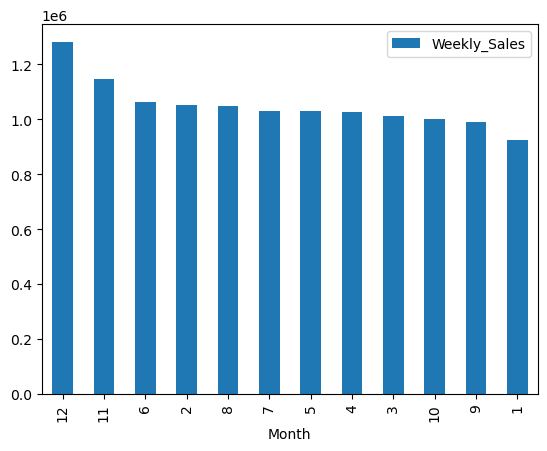

In [24]:
data[['Month','Weekly_Sales']].groupby(['Month'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False).plot.bar()


In [25]:
data[['Year','Weekly_Sales']].groupby(['Year'],as_index=True).mean().sort_values(by='Weekly_Sales',ascending=False)#.plot.bar()

,Weekly_Sales
Year,
2010,1.059670e+06
2011,1.046239e+06
2012,1.033660e+06


In [26]:
data[['Year','CPI']].groupby(['Year'],as_index=True).mean().sort_values(by='CPI',ascending=False)

,CPI
Year,
2012,175.498781
2011,171.545716
2010,168.101782


In [32]:
data = data.drop(columns=['Temp_Category'])

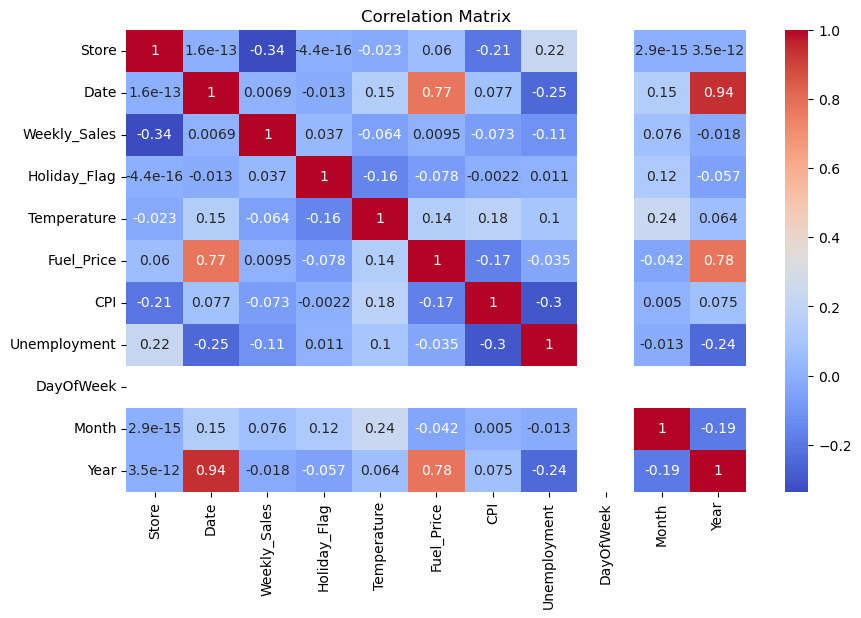

In [33]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Time series Analysis

In [34]:
#visualize the underlying components of the time series, including trend, seasonality, and residual.
decomposition = seasonal_decompose(data['Weekly_Sales'], period=7)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

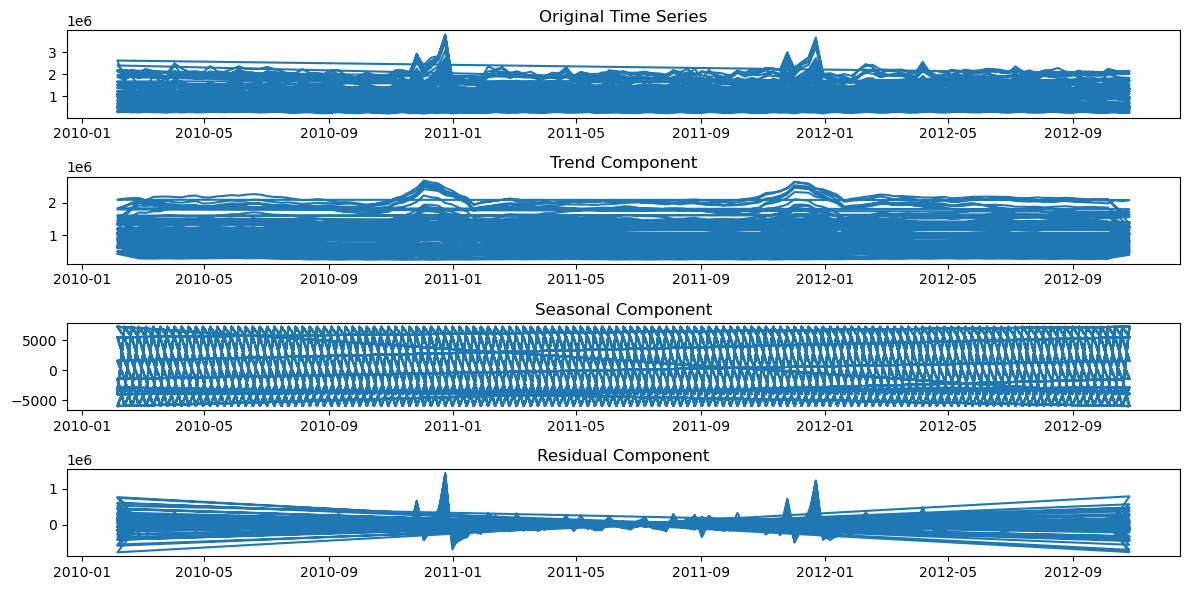

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data['Date'], data['Weekly_Sales'], label='Original')
plt.title('Original Time Series')
plt.subplot(412)
plt.plot(data['Date'], trend, label='Trend')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(data['Date'], seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(data['Date'], residual, label='Residual')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

Compare three ML models:

Linear Regression
Random Forest Regressor
SARIMA (Seasonal Autoregressive Integrated Moving Average) We will compare the three models and pick the best perfoming model

In [36]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [37]:
# Split the data into features and target variable
X = data[['Store', 'Holiday_Flag', 'CPI', 'DayOfWeek', 'Month', 'Year']]
y = data['Weekly_Sales']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [39]:
linear_model = LinearRegression()

In [40]:
# Fit the model to the training data
linear_model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Get the coefficients of the Linear Regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': linear_model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print('Linear Regression Coefficients:')
print(coefficients)

Linear Regression Coefficients:
        Feature   Coefficient
1  Holiday_Flag  6.378827e+04
4         Month  1.367282e+04
5          Year  4.234399e+03
3     DayOfWeek -2.910383e-11
2           CPI -2.086117e+03
0         Store -1.571423e+04


In [42]:
# Predict sales on the test set
y_pred_linear = linear_model.predict(X_test)

In [43]:
# Calculate evaluation metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Linear Regression Mean Absolute Error (MAE): {mae_linear}')
print(f'Linear Regression R-squared (R2): {r2_linear}')

Linear Regression Mean Squared Error (MSE): 274358062063.7012
Linear Regression Mean Absolute Error (MAE): 434468.76306282723
Linear Regression R-squared (R2): 0.14836512598967289


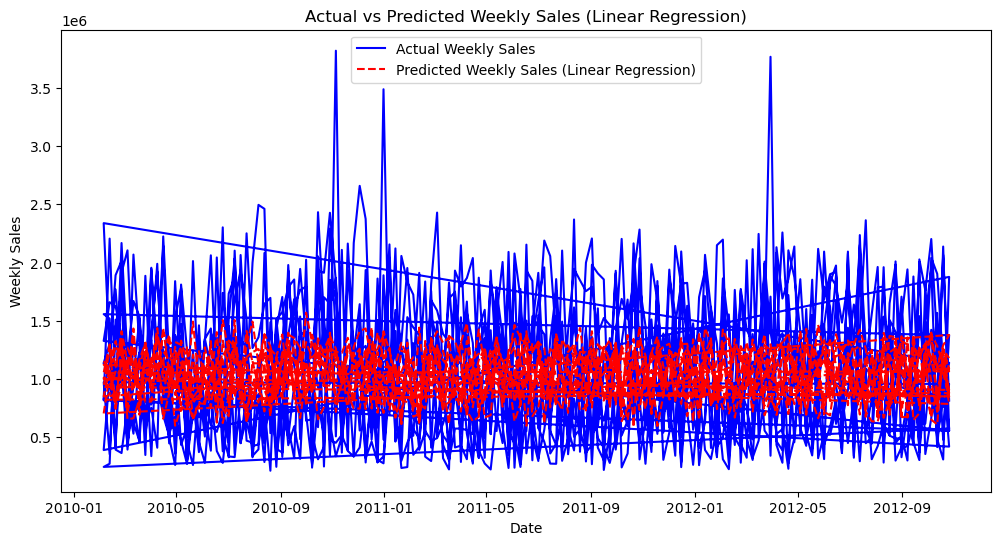

In [44]:
# Plot actual vs predicted sales for Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][len(data)-len(y_test):], y_test, label='Actual Weekly Sales', color='blue')
plt.plot(data['Date'][len(data)-len(y_test):], y_pred_linear, label='Predicted Weekly Sales (Linear Regression)', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Linear Regression)')
plt.legend()
plt.show()

Random Forest Regressor

In [45]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [46]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
# Predict sales on the test set
y_pred_rf = rf_model.predict(X_test)

In [48]:
# Calculate evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'Random Forest Mean Absolute Error (MAE): {mae_rf}')
print(f'Random Forest R-squared (R2): {r2_rf}')

Random Forest Mean Squared Error (MSE): 18565147603.976215
Random Forest Mean Absolute Error (MAE): 70494.92054607614
Random Forest R-squared (R2): 0.9423719244050338


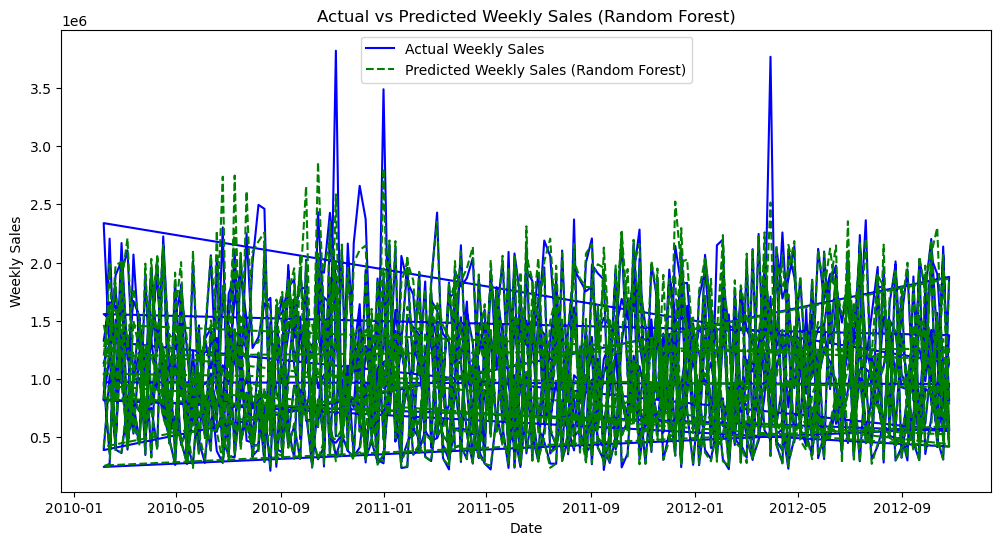

In [49]:
# Plot actual vs predicted sales for Random Forest
plt.figure(figsize=(12, 6))
plt.plot(data['Date'][len(data)-len(y_test):], y_test, label='Actual Weekly Sales', color='blue')
plt.plot(data['Date'][len(data)-len(y_test):], y_pred_rf, label='Predicted Weekly Sales (Random Forest)', color='green', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs Predicted Weekly Sales (Random Forest)')
plt.legend()
plt.show()

In [50]:
# Get feature importances for Random Forest
rf_feature_importance = rf_model.feature_importances_

# Pair feature names with their importance scores
feature_names = X.columns
rf_feature_importance_dict = dict(zip(feature_names, rf_feature_importance))

# Sort features by importance in descending order
rf_sorted_feature_importance = sorted(rf_feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
print('Random Forest Feature Importance:')
for feature, importance in rf_sorted_feature_importance:
    print(f'{feature}: {importance}')

Random Forest Feature Importance:
Store: 0.764231221832417
CPI: 0.18648012826680344
Month: 0.037763010795528025
Holiday_Flag: 0.006533810476728712
Year: 0.004991828628522889
DayOfWeek: 0.0


Time Series Forecasting - SARIMA

In [52]:
# Sort the data by date for time series analysis
data.sort_values('Date', inplace=True)

In [53]:
# Create a SARIMA model for weekly sales forecasting
sarima_model = SARIMAX(data['Weekly_Sales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_results = sarima_model.fit()

C:\Users\Apurva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Apurva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [54]:
# Calculate SARIMA predictions on the training data
y_pred_sarima_training = sarima_results.predict(start=0, end=len(X_train) - 1)

In [55]:
# Calculate MSE and MAE for SARIMA on the training data
mse_sarima_training = mean_squared_error(y_train, y_pred_sarima_training)
mae_sarima_training = mean_absolute_error(y_train, y_pred_sarima_training)

# Print SARIMA training accuracy metrics
print(f'SARIMA Mean Squared Error (MSE) on Training Data: {mse_sarima_training}')
print(f'SARIMA Mean Absolute Error (MAE) on Training Data: {mae_sarima_training}')

SARIMA Mean Squared Error (MSE) on Training Data: 333448149518.67084
SARIMA Mean Absolute Error (MAE) on Training Data: 476756.11708714976


In [56]:
# Forecast future sales using SARIMA
future_sales_sarima = sarima_results.forecast(steps=len(X_test))
future_data = X_test.copy()
future_data['Predicted_Weekly_Sales_SARIMA'] = future_sales_sarima

C:\Users\Apurva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Apurva\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [57]:
# Calculate evaluation metrics for SARIMA on the test data
mse_sarima = mean_squared_error(y_test, future_sales_sarima)
mae_sarima = mean_absolute_error(y_test, future_sales_sarima)
r2_sarima = r2_score(y_test, future_sales_sarima)
print(f'SARIMA Mean Squared Error (MSE) on Test Data: {mse_sarima}')
print(f'SARIMA Mean Absolute Error (MAE) on Test Data: {mae_sarima}')
print(f'SARIMA R-squared (R2) on Test Data: {r2_sarima}')

SARIMA Mean Squared Error (MSE) on Test Data: 326096806075.2953
SARIMA Mean Absolute Error (MAE) on Test Data: 472424.3491572751
SARIMA R-squared (R2) on Test Data: -0.012237111853572902


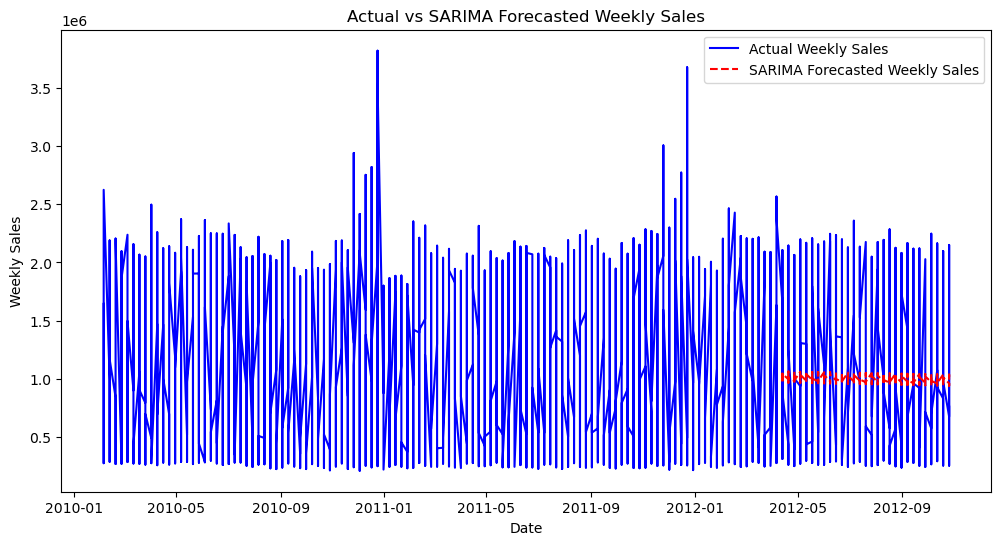

In [58]:
# Plot actual vs predicted sales for SARIMA
plt.figure(figsize=(12, 6))
# Plot actual sales for the historical data
plt.plot(data['Date'], data['Weekly_Sales'], label='Actual Weekly Sales', color='blue')
# Plot SARIMA forecast for the future data
plt.plot(data['Date'].iloc[-len(X_test):], future_sales_sarima, label='SARIMA Forecasted Weekly Sales', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Actual vs SARIMA Forecasted Weekly Sales')
plt.legend()
plt.show()

Comparing all 3 models

In [61]:
# Compare model accuracies
print(f'Linear Regression Mean Squared Error (MSE): {mse_linear}')
print(f'Random Forest Mean Squared Error (MSE): {mse_rf}')
print(f'SARIMA Mean Squared Error (MSE): {mse_sarima}')

Linear Regression Mean Squared Error (MSE): 274358062063.7012
Random Forest Mean Squared Error (MSE): 18565147603.976215
SARIMA Mean Squared Error (MSE): 326096806075.2953


Random Forest model gives the best results with the lowest MSE and an R2 value of 0.9423719244050338

Linear regreassion has an MSE 274358062063 and an R2 value of 0.148365125989673, which shows that the data is non linear and does not fit a linear model.

The SARIMA model gives the worst results but with some changes it can be improved to give better results